# Mapping

Map data onto a geographic map!

### geographic keywords
For geographic annotations, there are these keywords:

ahlive keyword | type | scope | description
--- | --- | --- | ---
`crs` | `str` | subplot | the data's projection coordinate reference system (crs)
`projection` | `str` | subplot | the desired output crs
`central_lon` | `float` | subplot | the desired longitude in degrees to center on
`borders` | `bool` | subplot | whether to show country borders
`coastline` | `bool` | subplot | whether to show coastlines
`tiles` | `bool` | subplot | whether to show tiles
`zoom` | `int` | subplot | zoom level of tiles
`land` | `bool` | subplot | whether to show land
`ocean` | `bool` | subplot | whether to show ocean
`lakes` | `bool` | subplot | whether to show lakes
`rivers` | `bool` | subplot | whether to show rivers
`states` | `bool` | subplot | whether to show US states' borders
`worldwide` | `bool` | subplot | whether to set to global extents

### reference crs
To utilize any geographic annotations, pass `crs` OR `projection` as an instantiated `cartopy.crs` object the class name.

`crs` specifies the data's coordinate reference system; it's often set to `ccrs.PlateCarree()`, or conveniently `'platecarree'`, if the data is in degrees.

In [ ]:
import xarray as xr
import ahlive as ah
ds = xr.tutorial.open_dataset('air_temperature').isel(time=slice(0, 3))
ah_ds = ah.Dataset(ds, 'lon', 'lat', 'air', crs='platecarree')
ah_ds.render()

### projection crs

`projection` on the other hand specifies the desired output crs. If `crs` is not specified, but `projection` is set, `crs` defaults to `ccrs.PlateCarree()`.

In [ ]:
import xarray as xr
import ahlive as ah
ds = xr.tutorial.open_dataset('air_temperature').isel(time=slice(0, 3))
ah_ds = ah.Dataset(ds, 'lon', 'lat', 'air', projection='lambertconformal')
ah_ds.render()

In [ ]:
import xarray as xr
import ahlive as ah
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ds = xr.tutorial.open_dataset("air_temperature").isel(time=slice(0, 3))
ah_ds = ah.Dataset(
    ds,
    "lon",
    "lat",
    "air",
    projection=ccrs.Orthographic(central_latitude=25, central_longitude=-88),
    coastline=cfeature.COASTLINE.with_scale("50m"),
)
ah_ds.render()

### geographic features

After setting either `crs` or `projection`, geographic features can be toggled.

In [ ]:
import xarray as xr
import ahlive as ah
ds = xr.tutorial.open_dataset('air_temperature').isel(time=slice(0, 3))
ah_ds = ah.Dataset(
    ds, 'lon', 'lat', 'air', projection='lambertconformal',
    land=True, ocean=True, borders=True, states=True)
ah_ds.render()

### worldwide view

`worldwide` can be set to view the data on a global extent.

In [ ]:
import xarray as xr
import ahlive as ah
ds = xr.tutorial.open_dataset('air_temperature').isel(time=slice(0, 3))
ah_ds = ah.Dataset(
    ds, 'lon', 'lat', 'air', projection='robinson', worldwide=True)
ah_ds.render()

### central longitude

The `central_lon` is automatically set to the median longitude of the data, but can be set manually.

In [ ]:
import xarray as xr
import ahlive as ah
ds = xr.tutorial.open_dataset('air_temperature').isel(time=slice(0, 3))
ah_ds = ah.Dataset(
    ds, 'lon', 'lat', 'air',
    projection='robinson', worldwide=True, central_lon=0)
ah_ds.render()

### tiles and zoom

Web `tiles` can also be retrieved; click [here](https://scitools.org.uk/cartopy/docs/latest/cartopy/io/img_tiles.html) for a listing of available tiles.

[########################################] | 100% Completed |  8.8s



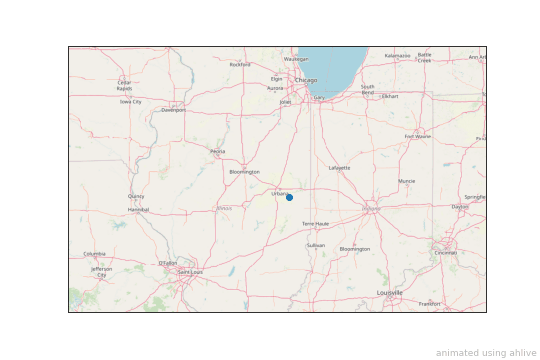

In [1]:
import ahlive as ah
arr = ah.Array(
    [-88, -88.2, -88.5], [40, 40.5, 40.05], tiles="OSM", zoom=7
).config("tiles", style="toner")
arr.render()